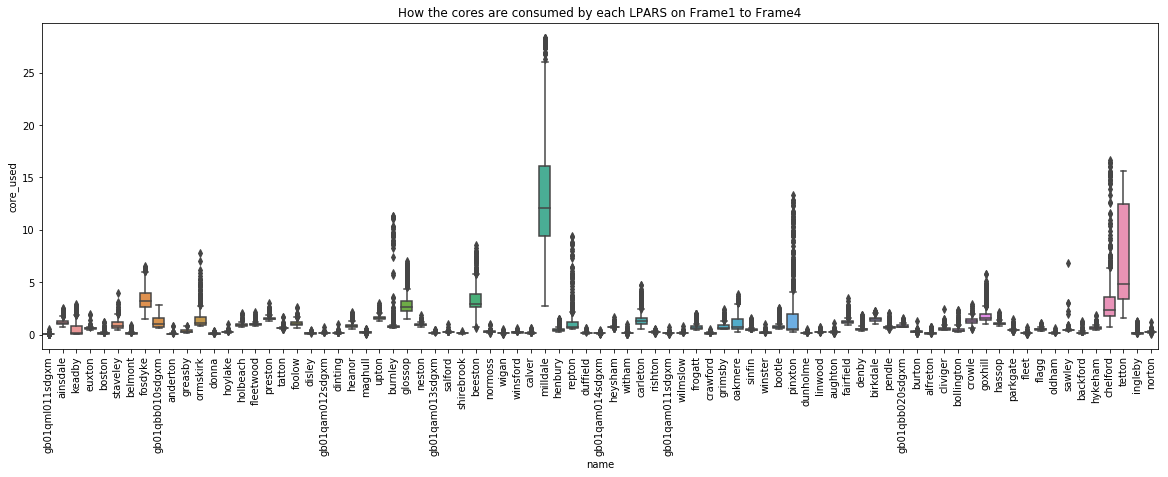

In [1]:
%matplotlib inline
# New method
#Owner : abhishek.panakkaran@in.ibm.com
#date : 30-Aug-2019
''' Purpose of this script is to model AIX frame for the last weeks data and perform dynamincwhat if analysys

    1) Current Model of AIX estate cpu_cores consumption
    2) Whatif when 10% of load is increased 
    3) What will be the utilization when we failed over the nodes to others
    
    '''

import pandas as pd


''' BASELINE - This list is gathered from lpar2rrd. This acts as a baseline for each frame. 
     So that any missing servers value should be fed in to'''


#dictonary defines dedicated lpar, dedicated CPU , cores for shared pool
# this value is later referred to filter out these values from csv as dedicated lpar has less number of columns than shared lpars

dedicated_lpars = {"f2":["widnes",2,62],"f3":["ripley",3,61],"f4":["stamford",3,61]}

servers_in_line_with_peak = ['linwood','milldale','aughton','beeston','glossop','goxhill','wilmslow','carleton','calver','crowle']


# by default , all data types are read as objects in pandas. pandas type Obj is eqvilanant to strings in 
# define function to clean columns which are numeric. This functions are later called with apply functions

def abhi_string_to_numeric(arg1):
    return int(arg1)
          
def abhi_obt_to_string_to_float(arg1):
    new_val = arg1.strip().replace("%","")
    return float(new_val)

def abhi_obt_to_string(arg1):
    new_val = arg1.strip()
    return str(new_val)



x1 = pd.read_csv("Fdata.csv",header=16,skip_blank_lines=True,low_memory=False)

new_cols = ["name","date","time","box","obs","cpupct","runq","core_used","total","available","machine","max_core_used"]

x1.columns = new_cols

x1 = x1.loc[x1.machine != '-']

xF1 = x1.loc[x1.box.astype(str).str.contains("FRAME1")]
xF2 = x1.loc[x1.box.astype(str).str.contains("FRAME2")]
xF3 = x1.loc[x1.box.astype(str).str.contains("FRAME3")]
xF4 = x1.loc[x1.box.astype(str).str.contains("FRAME4")]

xp = pd.concat(objs=[xF1,xF2,xF3,xF4],axis=0)


# dedicated lpars has less number of columns compare to normal lpars
# filter out all the dedicated lpars from the data. This step is important as dedicated lpar has lesser number of columns

for item in dedicated_lpars:
    xp = xp.loc[(xp.name != dedicated_lpars[item][0])]
    
import numpy as np


xp.name = xp.name.apply(abhi_obt_to_string)
xp.total = xp.total.apply(abhi_string_to_numeric)


xp.available = xp.available.apply(abhi_obt_to_string_to_float)
xp.max_core_used = xp.max_core_used.apply(abhi_obt_to_string_to_float)
xp.core_used = xp.core_used.apply(abhi_obt_to_string_to_float)
xp.runq = xp.runq.apply(abhi_obt_to_string_to_float)
xp.cpupct = xp.cpupct.apply(abhi_obt_to_string_to_float)

# put the formated dataframe to a csv for refering

# 0.1 for 10% , 0.2 for 20% and so

xp['tenpct_higher'] = xp['core_used'] + xp['core_used'] * 0.1 

xp['diff_core'] = xp['tenpct_higher'] - xp['core_used']

xp['pool_size'] = xp['total']

xp['pool_size'] = xp['pool_size'].astype(np.float64)






# Create a new 

xp.to_csv("xp.csv")


#print(xp.info())
#print(xp.head(10))

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
#fig, ax = plt.subplots()
#sns.set(style="whitegrid")

xp.head(30)

F1D = xp.loc[(xp.box.str.contains("FRAME3"))]
     
plt.figure(figsize=(20, 6))
plt.xticks(rotation=90)
sns.boxplot(data=xp,y='core_used',x='name',order=list(set(xp.name)))
plt.title("How the cores are consumed by each LPARS on Frame1 to Frame4")
#ax.set_xticklabels(labels=list(set(xp.name)),rotation=90);
plt.show()



# Create a sub data frame with only core_used values 

#----xp1 = xp[['name','box','date','time','core_used']]
#----df_cores_consumed_95th = xp1.groupby(['box','name']).quantile(1)

# Create a sub data frame with only available pool processor values 
# this code is to retrive out available processor pool from one lpar from each frame 

#----xp2 = xp[['name','box','date','time','available']]

# below  code is to retrive out available processor pool from only from aughton, beeston , glossop, goxhill
# reason is other lpars are showing irratic values and will negatively impact the summarization

#----xp2_filterd = xp2.query('name =="glossop" or name =="goxhill" or name =="aughton" or name =="beeston"')

# here we took the 0.05th percentile as the we are looking in a reverse order.ie   100 - 0.05 = 95th percentile of used
# used = 100 - available

#----df_available_pool_95th = xp2_filterd.groupby(['box']).quantile(0.05) 


            




In [2]:
print("\n From lpar2rrd portal get the baseline on frame 1 to 4 manually. This list is based on Sep-2019")

f1_list = ["aughton_prod","belmont_prod","birkdale_prod","bootle_nonprod","burnley_nonprod","carleton_prod","cliviger_prod","crawford_prod","euxton_nonprod","fleetwood_prod","gb01qam011sdgxm","gb01qbb010sdgxm_nim1","gb01qml011sdgxm","heysham_nonprod","maghull_nonprod","normoss_nonprod","npvio1a","npvio1b","oldham_nonprod","pendle_nonprod","preston_nonprod","pvio1a","pvio1b","rishton_nonprod","salford_nonprod","sawley_nonprod","wigan_nonprod"
]

f2_list = ["ainsdale_prod","anderton_prod","backford_prod","beeston_prod","bollington_prod","burton_prod","chelford_prod","disley_nonprod","gb01qam012sdgxm","gb01qbb020sdgxm_nim2","greasby_nonprod","henbury_prod","hoylake_prod","neston_nonprod","norton_nonprod","npvio2a","npvio2b","oakmere_nonprod","ormskirk_prod","parkgate_nonprod","pvio2a","pvio2b","tatton_nonprod","tetton_prod","upton_nonprod","widnes_nonprod","wilmslow_prod","winsford_nonprod"]


f3_list = ["alfreton_prod","calver_prod","dinting_prod","duffield_prod","fairfield_prod","flagg_prod","foolow_prod","gb01qam013sdgxm","glossop_prod","hassop_nonprod","heanor_nonprod","milldale_prod","npvio3a","npvio3b","pinxton_prod","pvio3a","pvio3b","repton_prod","ripley_prod","shirebrook_prod","sinfin_prod","staveley_prod","winster_prod"
]

f4_list = ["boston_prod","crowland_prod","crowle_prod","denby_prod","donna_prod","dunholme_prod","fleet_prod","fosdyke_prod","frogatt_prod","gb01qam014sdgxm","goxhill_prod","grimsby_prod","holbeach_nonprod","hykeham_nonprod","ingleby_prod","keadby_prod","linwood_prod","npvio4a","npvio4b","pvio4a","pvio4b","spilsby_prod","stamford_prod","witham_prod"
]

f4_list

def format_underscore(str1):
    return str1.split("_")[0]

f1_list_baseline = list(map(format_underscore,f1_list))
f2_list_baseline = list(map(format_underscore,f2_list))
f3_list_baseline = list(map(format_underscore,f3_list))
f4_list_baseline = list(map(format_underscore,f4_list))

lpar2rrd_baseline = f1_list_baseline + f2_list_baseline + f3_list_baseline + f4_list_baseline

del(f1_list_baseline,f2_list_baseline,f3_list_baseline,f4_list_baseline)
del(f1_list,f2_list,f3_list,f4_list)

lpar2rrd_baseline

srm_baseline = list(set(xp['name']))

print(" Baselines Lpar2rrd {} , SRM {}".format(len(lpar2rrd_baseline),len(srm_baseline)))


# to find the difference between the list , we need to convert them to set

non_reported_list = list(set(lpar2rrd_baseline) - set(srm_baseline))
print(non_reported_list)








 From lpar2rrd portal get the baseline on frame 1 to 4 manually. This list is based on Sep-2019
 Baselines Lpar2rrd 102 , SRM 81
['npvio2b', 'npvio1a', 'stamford', 'pvio1b', 'npvio3a', 'widnes', 'crowland', 'pvio2b', 'pvio2a', 'ripley', 'npvio1b', 'npvio4b', 'pvio4b', 'pvio4a', 'npvio4a', 'npvio3b', 'pvio3b', 'pvio3a', 'spilsby', 'pvio1a', 'npvio2a']




 Core consumption destribution of Bigger Lpars by Frame, where cores consumed > 4


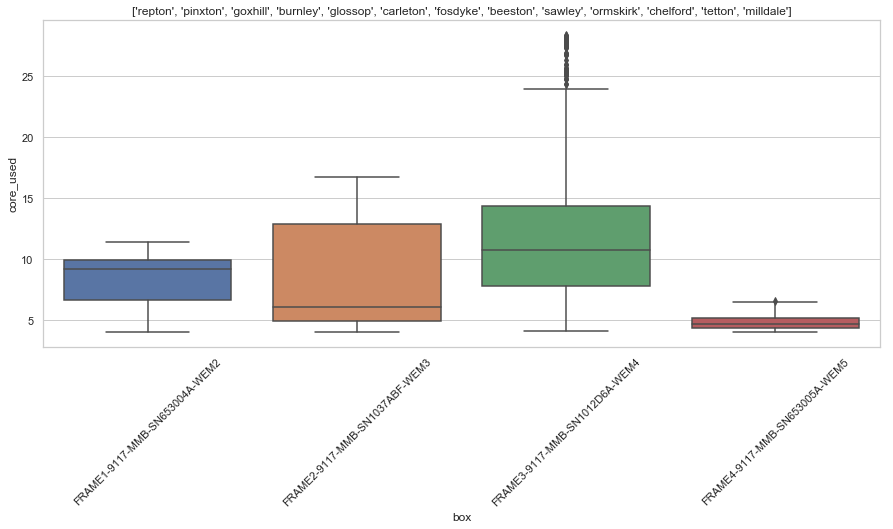



 How the Frame cpu_core consumption looks like with 10% load on each lpars extra


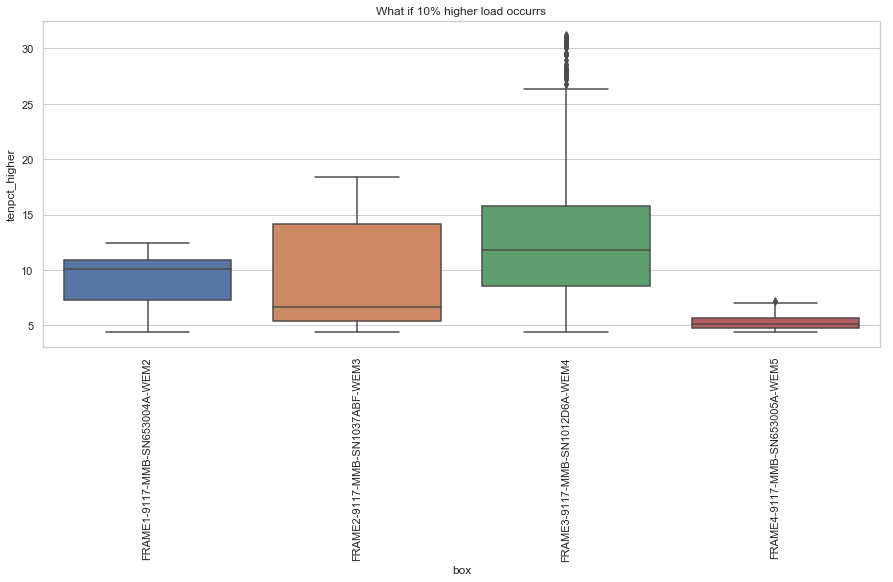

In [3]:
%matplotlib inline
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
#fig, ax = plt.subplots()
sns.set(style="whitegrid")

F1D = xp.loc[(xp.box.str.contains("FRAME3"))]


#print(xp.info())

a = xp.groupby('time')


#https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib

# draw boxplots on the highest consumption per core

print("\n\n Core consumption destribution of Bigger Lpars by Frame, where cores consumed > 4")
plt.figure(figsize=(15, 6));
chart=sns.boxplot(data=xp[xp['core_used'] > 4],x='box',y='core_used')
#chart=sns.boxplot(data=xp[xp['core_used'] > 4].groupby('box')['max'],x='box',y='core_used')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set_title(list(set(xp[xp['core_used'] > 4]['name'])))
plt.show()


print("\n\n How the Frame cpu_core consumption looks like with 10% load on each lpars extra")

#https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib
plt.figure(figsize=(15, 6));
plt.xticks(rotation=90);
chart=sns.boxplot(data=xp[xp['core_used'] > 4],x='box',y='tenpct_higher' )
#chart=sns.catplot(data=xp[xp['core_used'] > 1],x='box',y='tenpct_higher', col='box')
plt.title("What if 10% higher load occurrs")
plt.show();


In [4]:
f4_list_baseline

NameError: name 'f4_list_baseline' is not defined

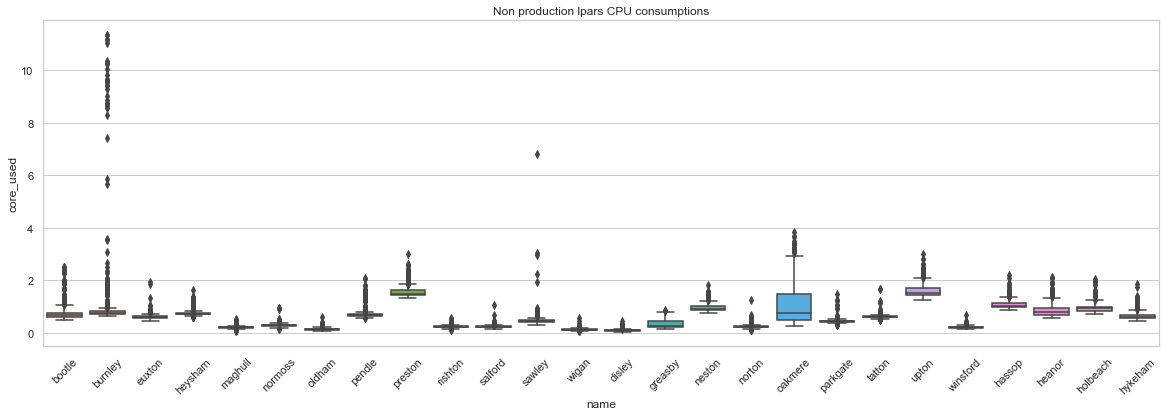

count      mean       std   min  \
box                            name                                        
FRAME1-9117-MMB-SN653004A-WEM2 bootle    576.0  0.757569  0.323135  0.49   
                               burnley   672.0  1.221354  1.760742  0.65   
                               euxton    192.0  0.633021  0.162146  0.47   
                               heysham   672.0  0.760551  0.126325  0.59   
                               maghull   672.0  0.211146  0.041822  0.09   
                               normoss   576.0  0.293802  0.063132  0.15   
                               oldham    672.0  0.152277  0.041056  0.07   
                               pendle    672.0  0.740893  0.193035  0.56   
                               preston   672.0  1.580789  0.213383  1.32   
                               rishton   672.0  0.239747  0.044411  0.11   
                               salford   672.0  0.236786  0.051881  0.15   
                               sawley    671.0  0.470894  0.303438  0.31   
                               wigan     480.0  0.128146  0.038186  0.06   
FRAME2-9117-MMB-SN1037ABF-WEM3 disley    672.0  0.109598  0.032529  0.05   
                               greasby   576.0  0.329410  0.137748  0.14   
                               neston    672.0  0.969182  0.118027  0.76   
                               norton    672.0  0.242946  0.061636  0.10   
                               oakmere   480.0  1.128354  0.877584  0.26   
                               parkgate  576.0  0.462222  0.095099  0.31   
                               tatton    672.0  0.632872  0.081847  0.50   
                               upton     480.0  1.610375  0.237397  1.27   
                               winsford  672.0  0.217753  0.040303  0.14   
FRAME3-9117-MMB-SN1012D6A-WEM4 hassop    384.0  1.097161  0.188360  0.87   
                               heanor    672.0  0.867173  0.229976  0.57   
FRAME4-9117-MMB-SN653005A-WEM5 holbeach  672.0  0.932307  0.150243  0.72   
                               hykeham   480.0  0.649625  0.153383  0.47   

                                            25%    50%     75%    max  
box                            name                                    
FRAME1-9117-MMB-SN653004A-WEM2 bootle    0.5900  0.680  0.7800   2.53  
                               burnley   0.7300  0.770  0.8200  11.34  
                               euxton    0.5700  0.590  0.6400   1.95  
                               heysham   0.7100  0.730  0.7600   1.65  
                               maghull   0.1900  0.210  0.2200   0.52  
                               normoss   0.2600  0.290  0.3100   0.97  
                               oldham    0.1300  0.140  0.1700   0.60  
                               pendle    0.6600  0.690  0.7200   2.08  
                               preston   1.4600  1.500  1.6200   3.00  
                               rishton   0.2100  0.240  0.2500   0.58  
                               salford   0.2100  0.230  0.2500   1.05  
                               sawley    0.4100  0.440  0.4800   6.83  
                               wigan     0.1100  0.120  0.1400   0.58  
FRAME2-9117-MMB-SN1037ABF-WEM3 disley    0.0900  0.110  0.1200   0.46  
                               greasby   0.2200  0.260  0.4500   0.87  
                               neston    0.8900  0.930  1.0225   1.84  
                               norton    0.2100  0.240  0.2500   1.24  
                               oakmere   0.5000  0.770  1.4700   3.84  
                               parkgate  0.4300  0.450  0.4700   1.49  
                               tatton    0.6000  0.620  0.6400   1.69  
                               upton     1.4500  1.540  1.7100   2.99  
                               winsford  0.1900  0.210  0.2300   0.67  
FRAME3-9117-MMB-SN1012D6A-WEM4 hassop    0.9875  1.030  1.1425   2.19  
                               heanor    0.7000  0.805  0.9600   2.12  
FRAME4-9117-MMB-SN653005A-WEM5 holbeach 

In [5]:

# this is the list of resourse consumed by non production lpars
# this chart shows how much CPU can be saved by shutting down such lpars

xx = xp
    
nprod_f1 = ["bootle","burnley","euxton","heysham","maghull","normoss","oldham","pendle","preston","rishton","salford","sawley","wigan"]
nprod_f2 = ["disley","greasby","neston","norton","oakmere","parkgate","tatton","upton","widnes","winsford"]
nprod_f3 = ["hassop","heanor"]
nprod_f4 = ["holbeach","hykeham"]

nprod = nprod_f1 + nprod_f2 + nprod_f3 + nprod_f4

len(nprod)


#plt.xticks(rotation=90)
plt.figure(figsize=(20, 6))
chart = sns.boxplot(data=xx[xx['name'].isin (nprod)],x='name',y='core_used')
plt.title("Non production lpars CPU consumptions")
plt.xticks(rotation=45)
plt.show()

xx[xx['name'].isin(nprod)].groupby(['box','name'])['core_used'].describe()
#chart = sns.boxplot(data=xx[xx['box'].str.contains("FRAME4")],x='box',y='tenpct_higher')





In [6]:
#non production
# ~ represent not is in the nonproduction list
# print core consumption of all production servers and what is its impact on the frame
print("\n\nWhat is the guaranteed cores that can be saved by shutting down non-prod envs on each frames")
print(xx[xx['name'].isin(nprod)].groupby(['box','name'])['core_used'].describe().groupby(['box'])['min'].sum())

print("\n\nWhat is the Average cores that can be saved by shutting down non-prod envs on each frames")
print(xx[xx['name'].isin(nprod)].groupby(['box','name'])['core_used'].describe().groupby(['box'])['mean'].sum())





What is the guaranteed cores that can be saved by shutting down non-prod envs on each frames
box
FRAME1-9117-MMB-SN653004A-WEM2    5.02
FRAME2-9117-MMB-SN1037ABF-WEM3    3.53
FRAME3-9117-MMB-SN1012D6A-WEM4    1.44
FRAME4-9117-MMB-SN653005A-WEM5    1.19
Name: min, dtype: float64


What is the Average cores that can be saved by shutting down non-prod envs on each frames
box
FRAME1-9117-MMB-SN653004A-WEM2    7.426974
FRAME2-9117-MMB-SN1037ABF-WEM3    5.702712
FRAME3-9117-MMB-SN1012D6A-WEM4    1.964334
FRAME4-9117-MMB-SN653005A-WEM5    1.581932
Name: mean, dtype: float64


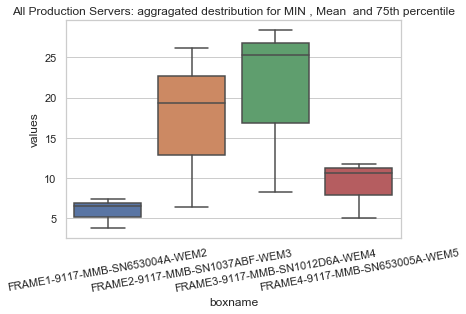

In [7]:
#production
# ~ represent not is in the nonproduction list
# print core consumption of all production servers and what is its impact on the frame
#print("\n\nWhat is the Aggragate min aggragate cores consumed by Frames")
a = xx[~xx['name'].isin(nprod)].groupby(['box','name'])['core_used'].describe().groupby(['box'])['min'].sum()

#print("\n\nWhat is the Aggragate Average aggragate cores consumed by Frames")
b = xx[~xx['name'].isin(nprod)].groupby(['box','name'])['core_used'].describe().groupby(['box'])['mean'].sum()

#print("\n\nWhat is the 75th Percentile Aggragate Average aggragate cores consumed by Frames")
c = xx[~xx['name'].isin(nprod)].groupby(['box','name'])['core_used'].describe().groupby(['box'])['75%'].sum()

#print("\n\nWhat is the MAX Aggragate Average aggragate cores consumed by Frames")
d = xx[~xx['name'].isin(nprod)].groupby(['box','name'])['core_used'].describe().groupby(['box'])['max'].sum()

e = pd.DataFrame(pd.concat( [a , b ,c ] , axis = 0))



#d.plot(kind='bar');
#c.plot(kind='bar', color='g')
#b.plot(kind='bar', color='r')
#a.plot(kind='bar', color='m')



e['box_name'] = e.index

e.columns = ["values","boxname"]
chart=sns.boxplot(data=e,x='boxname',y='values')
plt.xticks(rotation=10)
plt.title("All Production Servers: aggragated destribution for MIN , Mean  and 75th percentile")
plt.show()




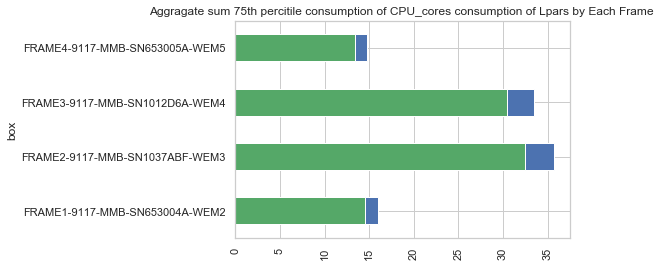

1-Exit | 2-Start Server | 3-Failover-draft| 4-Top15 Servers | 5-Shutdown | 6- shutdown all nonprod 4

Top 15 cpu consuming servers 
 box                             name           
FRAME3-9117-MMB-SN1012D6A-WEM4  milldale           16.0950
FRAME2-9117-MMB-SN1037ABF-WEM3  tetton             12.5075
FRAME4-9117-MMB-SN653005A-WEM5  fosdyke             4.0200
FRAME2-9117-MMB-SN1037ABF-WEM3  beeston             3.8825
                                chelford            3.5950
FRAME3-9117-MMB-SN1012D6A-WEM4  glossop             3.1725
FRAME4-9117-MMB-SN653005A-WEM5  goxhill             1.9400
FRAME3-9117-MMB-SN1012D6A-WEM4  pinxton             1.9325
FRAME2-9117-MMB-SN1037ABF-WEM3  upton               1.7100
                                ormskirk            1.6925
FRAME1-9117-MMB-SN653004A-WEM2  gb01qbb010sdgxm     1.6250
                                preston             1.6200
                                carleton            1.6100
                                birkdale            

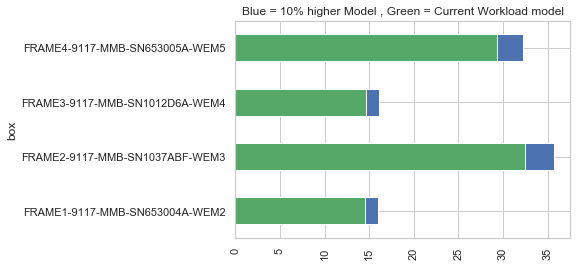

1-Exit | 2-Start Server | 3-Failover-draft| 4-Top15 Servers | 5-Shutdown | 6- shutdown all nonprod 4

Top 15 cpu consuming servers 
 box                             name           
FRAME4-9117-MMB-SN653005A-WEM5  linwood            16.0950
FRAME2-9117-MMB-SN1037ABF-WEM3  tetton             12.5075
FRAME4-9117-MMB-SN653005A-WEM5  fosdyke             4.0200
FRAME2-9117-MMB-SN1037ABF-WEM3  beeston             3.8825
                                chelford            3.5950
FRAME3-9117-MMB-SN1012D6A-WEM4  glossop             3.1725
FRAME4-9117-MMB-SN653005A-WEM5  goxhill             1.9400
FRAME3-9117-MMB-SN1012D6A-WEM4  pinxton             1.9325
FRAME2-9117-MMB-SN1037ABF-WEM3  upton               1.7100
                                ormskirk            1.6925
FRAME1-9117-MMB-SN653004A-WEM2  gb01qbb010sdgxm     1.6250
                                preston             1.6200
                                carleton            1.6100
                                birkdale            

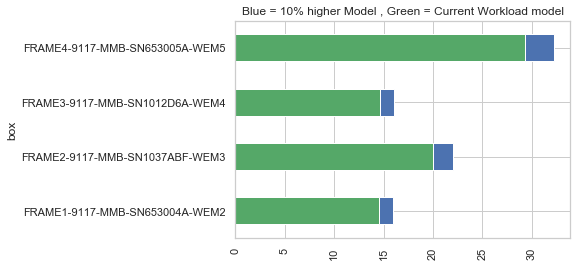

1-Exit | 2-Start Server | 3-Failover-draft| 4-Top15 Servers | 5-Shutdown | 6- shutdown all nonprod 4

Top 15 cpu consuming servers 
 box                             name           
FRAME4-9117-MMB-SN653005A-WEM5  linwood            16.0950
                                fosdyke             4.0200
FRAME2-9117-MMB-SN1037ABF-WEM3  beeston             3.8825
                                chelford            3.5950
FRAME3-9117-MMB-SN1012D6A-WEM4  glossop             3.1725
FRAME4-9117-MMB-SN653005A-WEM5  goxhill             1.9400
FRAME3-9117-MMB-SN1012D6A-WEM4  pinxton             1.9325
FRAME2-9117-MMB-SN1037ABF-WEM3  upton               1.7100
                                ormskirk            1.6925
FRAME1-9117-MMB-SN653004A-WEM2  gb01qbb010sdgxm     1.6250
                                preston             1.6200
                                carleton            1.6100
                                birkdale            1.6000
FRAME4-9117-MMB-SN653005A-WEM5  crowle              

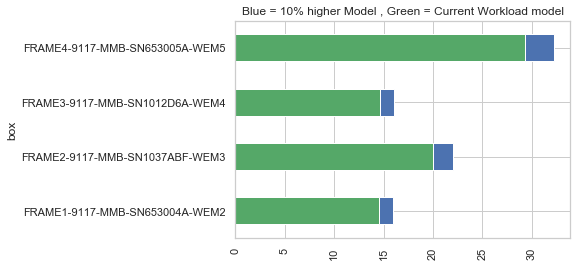

1-Exit | 2-Start Server | 3-Failover-draft| 4-Top15 Servers | 5-Shutdown | 6- shutdown all nonprod 2
Make any of these active ['tetton'] 'Hit enter if nothing' tetton
Current shutdown servers : set()


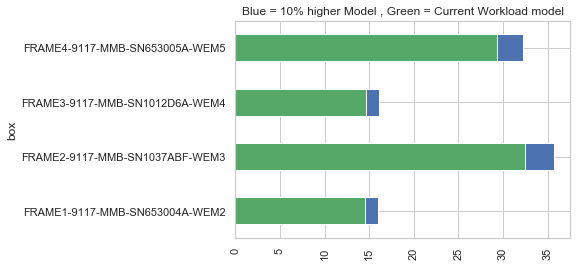

1-Exit | 2-Start Server | 3-Failover-draft| 4-Top15 Servers | 5-Shutdown | 6- shutdown all nonprod 2
Make any of these active [] 'Hit enter if nothing' 
Current shutdown servers : set()


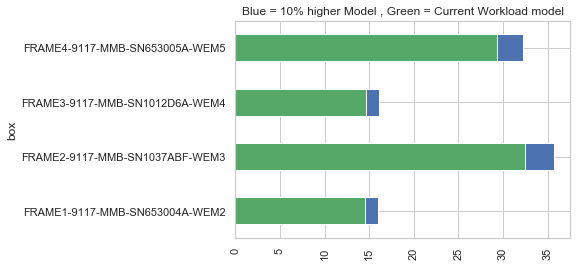

1-Exit | 2-Start Server | 3-Failover-draft| 4-Top15 Servers | 5-Shutdown | 6- shutdown all nonprod 3
1 : switch Aughton beeston pair 
 2 : switch linwood milldale pair 
 3 : wilmslow carleton pair : implemen2
Switching linwood and milldale workloads
Moving workload from Function
Current shutdown servers : set()


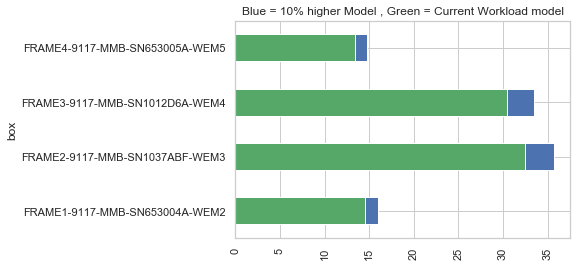

1-Exit | 2-Start Server | 3-Failover-draft| 4-Top15 Servers | 5-Shutdown | 6- shutdown all nonprod 4

Top 15 cpu consuming servers 
 box                             name           
FRAME3-9117-MMB-SN1012D6A-WEM4  milldale           16.0950
FRAME2-9117-MMB-SN1037ABF-WEM3  tetton             12.5075
FRAME4-9117-MMB-SN653005A-WEM5  fosdyke             4.0200
FRAME2-9117-MMB-SN1037ABF-WEM3  beeston             3.8825
                                chelford            3.5950
FRAME3-9117-MMB-SN1012D6A-WEM4  glossop             3.1725
FRAME4-9117-MMB-SN653005A-WEM5  goxhill             1.9400
FRAME3-9117-MMB-SN1012D6A-WEM4  pinxton             1.9325
FRAME2-9117-MMB-SN1037ABF-WEM3  upton               1.7100
                                ormskirk            1.6925
FRAME1-9117-MMB-SN653004A-WEM2  gb01qbb010sdgxm     1.6250
                                preston             1.6200
                                carleton            1.6100
                                birkdale            

In [8]:
# Owner Abhishek.Panakkaran
#production
# ~ represent not is in the nonproduction list
# print core consumption of all production servers and what is its impact on the frame

xx = xp

#print("\n\nWhat is the Minimum aggragate")
a = xx.groupby(['box','name'])['core_used'].describe().groupby(['box'])['min'].sum()

#print("\n\nWhat is the Aggragate Average aggragate cores consumed by Frames")
b = xx.groupby(['box','name'])['core_used'].describe().groupby(['box'])['mean'].sum()

#print("\n\nWhat is the 75th Percentile Aggragate Average aggragate cores consumed by Frames")
c = xx.groupby(['box','name'])['core_used'].describe().groupby(['box'])['75%'].sum()

#print("\n\nWhat is the MAX Aggragate Average aggragate cores consumed by Frames")
d = xx.groupby(['box','name'])['tenpct_higher'].describe().groupby(['box'])['75%'].sum()

plt.xticks(rotation=90)
d.plot(kind='barh', color ='b');
c.plot(kind='barh', color='g')
#b.plot(kind='bar', color='r')
#a.plot(kind='bar', color='m')
plt.title("Aggragate sum 75th percitile consumption of CPU_cores consumption of Lpars by Each Frame ")
plt.show()

def render_display(passive):
    print("Current shutdown servers : {}".format(set(passive)))
    c = xx[~xx['name'].isin(passive)].groupby(['box','name'])['core_used'].describe().groupby(['box'])['75%'].sum()
    d = xx[~xx['name'].isin(passive)].groupby(['box','name'])['tenpct_higher'].describe().groupby(['box'])['75%'].sum()
    plt.xticks(rotation=90)
    d.plot(kind='barh', color='b')
    c.plot(kind='barh', color='g')
    plt.title("Blue = 10% higher Model , Green = Current Workload model")
    
    plt.show()

    
def interchange_frames(ser1,ser2):
    global xx
    
    print("Moving workload from Function")
    
    '''get the corresponding Framenames from each server and assign that to a and b variable'''
        
    a = xx[xx['name'] == ser1]['box'][0:1]
    b = xx[xx['name'] == ser2]['box'][0:1]
    
    '''Convert the requrn object to a string output for a looks like below
        
    3681    FRAME2-9117-MMB-SN1037ABF-WEM3
    Name: box, dtype: object
        
    Step1 :  splits that first based on "\n" 
        
    Step2 : Take the parameters in position 0
    Step3 : Again aplit that by '_'
        
    Step4 : Frame name string appears on 4th position
        
    '''
    F1 = str(a).split("\n")[0].split(" ")[4].strip()
    F2 = str(b).split("\n")[0].split(" ")[4].strip()
        
    for index,row in xx.iterrows():

        if row[0] == ser1:
            #print(ser2)
            xx.at[index,'name'] = ser2
            xx.at[index,'box'] = F2

        elif row[0] == ser2:
            #print(ser1)
            xx.at[index,'name'] = ser1
            xx.at[index,'box'] = F1
        else:    
            pass
    
    
    '''using the replce function interchange the Frame name for those servers'''
    
   # for index,row in xx.iterrows():
        

   # xx['box'].replace( [Frame1 , Frame2] ,[Frame2 , Frame1], inplace=True )
    
    '''using the replce function interchange the servernames'''
   # xx['name'].replace([ser1, ser2],[ser2, ser1],inplace=True)
    
# below function will replace the servername each other. Effectievly simulates switching workloads to other frame    
def switch_workload(num_int):
    global xx
    if num_int == '1':
        print("Switching aughton and beeston workloads")
        #a = xx[xx['name'] == ser1]['box'][0:1]
        #Frame1 = str(a).split("\n")[0].split(" ")[4].strip()
        
        interchange_frames("aughton","beeston")
        #xx['name'].replace(['aughton','beeston'],['beeston','aughton'],inplace=True)
    elif num_int == '2':
        print("Switching linwood and milldale workloads")
        interchange_frames("linwood","milldale")
        #xx['name'].replace(['linwood','milldale'],['milldale','linwood'],inplace=True)
    elif num_int == '3':   
        print("Switching wilmslow and carleton workloads")
        interchange_frames("wilmslow","carleton")
        #xx['name'].replace(['wilmslow','carleton'],['carleton','wilmslow'],inplace=True)
    else: 
        print("kindly choose right values [1,2,3]")
 
active_servers = list(set(xx['name']))
passive_servers = []

if_exit = '0'

while if_exit != '1':
    
    choice = input("1-Exit | 2-Start Server | 3-Failover-draft| 4-Top15 Servers | 5-Shutdown | 6- shutdown all nonprod ").strip()
    
    if choice == '5':
        user_input= input("\nwhich server you need to shurdown {} 'Hit enter if nothing ' :  ".format(active_servers)).strip()
        if not user_input in passive_servers : passive_servers.append(user_input)
        render_display(passive_servers)
    
    elif choice == '2':
        user_input= input("Make any of these active {} 'Hit enter if nothing' ".format(passive_servers)).strip()
        if user_input in passive_servers : passive_servers.remove(user_input)
        render_display(passive_servers)
    
    elif choice == '3':
        failover = input("1 : switch Aughton beeston pair \n 2 : switch linwood milldale pair \n 3 : wilmslow carleton pair : implemen")
        switch_workload(failover)
        render_display(passive_servers)
        
    elif choice == '4':  
        print("\nTop 15 cpu consuming servers \n {}".format(xx[~xx['name'].isin(passive_servers)].groupby(['box','name'])['core_used'].describe()['75%'].sort_values(ascending=False).head(15)))
    
    elif choice == '6':
        print("\nshutting down NONProd servers")
        len(nprod)
        i=0;
        #passive_servers = []
        for i in range(len(nprod)):
            passive_servers.append(nprod[i])
        render_display(passive_servers)   
    else:
        if_exit = input("Press 1 to exit. Any key to continue").strip()
    
